In [1]:
import numpy as np
import matplotlib.image as mpimg  # for reading in images

import matplotlib.pyplot as plt
import cv2  # computer vision library

%matplotlib inline

# Load Images as Grids of Pixels

In [19]:
# Read in the image using matplotlib
image = mpimg.imread('./PIC/lvmu.jpg')
# or read in opencv
image2=cv2.imread('./PIC/lvmu.jpg')


In [24]:
# Print out the image dimensions
print('Image dimensions:', image.shape)

image[200][200] # image is nxmx3 array, n is height, m is width of picture, and 3 refer to RGB e.g.[R=198, G=145, B=93] as below
# below shows the RGB color index at pixel [200, 200] of this image 

Image dimensions: (462, 643, 3)


array([198, 145,  93], dtype=uint8)

In [22]:
image2[200][200] # open cv uses BGR while matplot lib uses RGB, that's why the number below is in reverse order as above 

array([ 93, 145, 198], dtype=uint8)

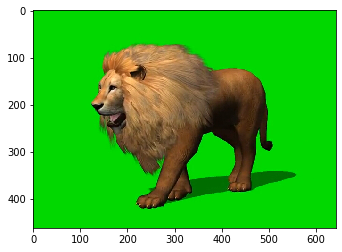

In [25]:
plt.imshow(image) #use matplot lib to convert image array to show image.

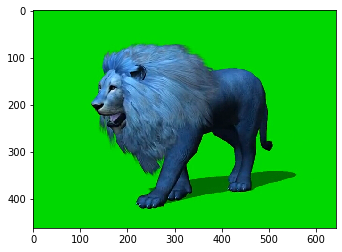

In [26]:
plt.imshow(image2) #since image2 here use opencv to open the picture, the RGB color is stored as BGR, therefore, when using
# plt.imshow which is part of matplotlib, it will mistakenly consider R=B, G=G, B=R, therefore the picture color is different
# from above, see below.

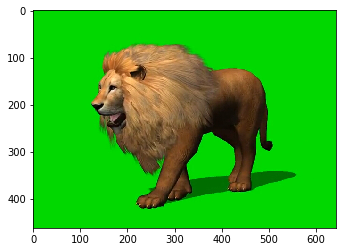

In [29]:
# to convert it back to RGB, use convert color index function .cvtColor to convert BGR to RGB using cv2.COLOR_BGR2RGB
# then print the image using matplotlib, it will then show correct color (see below)
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
plt.imshow(image2)

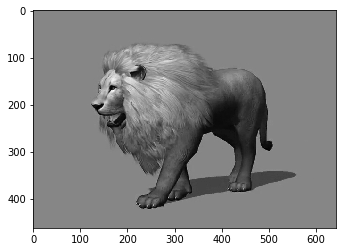

In [35]:
image = mpimg.imread('./PIC/lvmu.jpg')
# Change from color to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')

In [24]:
max_val = np.amax(gray_image)
min_val = np.amin(gray_image)

print('Max: ', max_val)
print('Min: ', min_val)

Max:  241
Min:  0


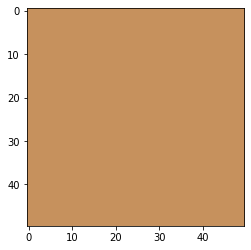

In [36]:
#check part of the picture using pixel index reference, example below shows image around pixel 200, 200

square = np.zeros((50, 50, 3), dtype = np.uint8)
square = cv2.rectangle(square, (int(0), 0), (int(50),50),
                        np.array(image[200][200],dtype = "uint8").tolist(), -1)
plt.imshow(square)

In [49]:
# extract RGB color separately
R = image[:, :, 0]
G = image[:, :, 1]
B = image[:, :, 2]

In [50]:
B[200][200]

93

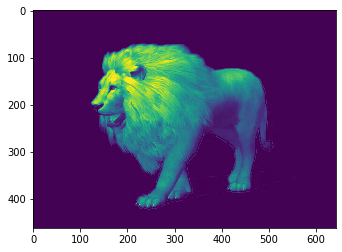

In [51]:
plt.imshow(R)

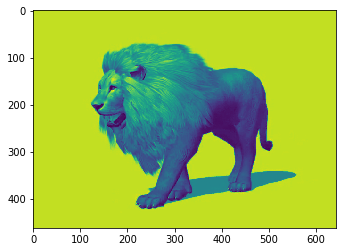

In [52]:
plt.imshow(G)

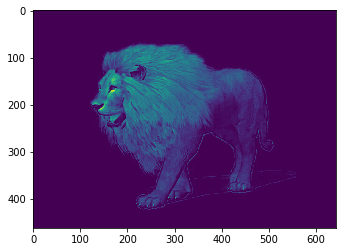

In [53]:
plt.imshow(B)

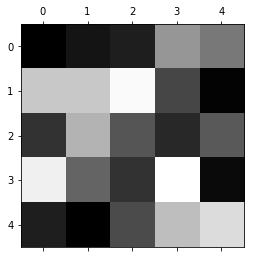

In [28]:
# Create a 5x5 image using just grayscale, numerical values
tiny_image = np.array([[0, 20, 30, 150, 120],
                      [200, 200, 250, 70, 3],
                      [50, 180, 85, 40, 90],
                      [240, 100, 50, 255, 10],
                      [30, 0, 75, 190, 220]])

# To show the pixel grid, use matshow
plt.matshow(tiny_image, cmap='gray')

# create mask (抠图)

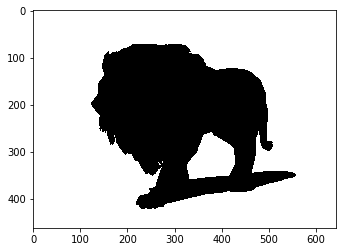

In [54]:
# Define our color selection boundaries in RGB values
lower_green = np.array([0,180,0]) 
upper_green = np.array([100,255,100])

# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

use method above to create mask will include the shadow of lion, not ideal when put lion to another background (see below)

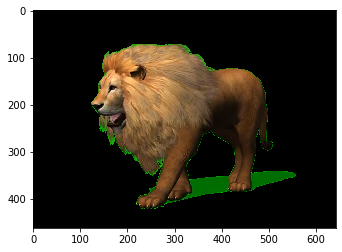

In [55]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)


use HSV color scale to achieve better separation of lion vs shadow vs. background

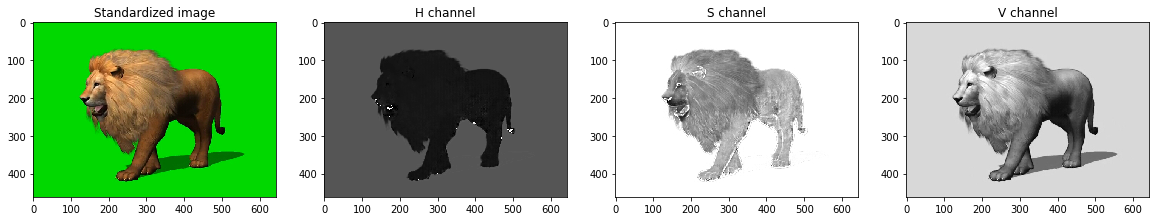

In [57]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV) # convert RGB to HSV -> HSV (hue, saturation, value)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Plot the original image and the three channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Standardized image')
ax1.imshow(image)
ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')
ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')
ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')

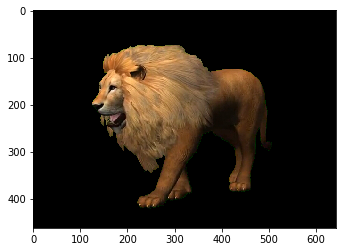

In [55]:
hsv_lower_green=np.array([35,43,46])
hsv_upper_green=np.array([77,255,255])
new_mask = cv2.inRange(hsv, hsv_lower_green, hsv_upper_green)
plt.imshow(mask, cmap='gray')
masked_image = np.copy(image)
masked_image[new_mask != 0] = [0, 0, 0]
plt.imshow(masked_image)

In [58]:
def avg_brightness(rgb_image):   
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    sum_brightness = np.sum(hsv[:,:,2])
    avg = 0
    avg = sum_brightness / (rgb_image.shape[0] *rgb_image.shape[1])    
    return avg

In [60]:
day_image = mpimg.imread('./PIC/daywai.jpg')
night_image = mpimg.imread('./PIC/nightwai.jpg')


In [62]:
avg_brightness(day_image)

113.01037194598392

In [63]:
avg_brightness(night_image)

37.4023397861213